# <center><font color="purple" face="Verdana, Geneva, sans-serif">US SUPERSTORE</font><center>

#### Import Necessary Libraries

In [1]:
# Basic Libraries
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)

#Visualziation
from matplotlib import pyplot as plt
import seaborn as sns

# machine learning
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor 

from sklearn.preprocessing import LabelEncoder 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

### <center><font color="blue">Load The Dataset</font><center>

**Import the dataset**

In [2]:
# read the  dataset and store in the variable df and check the top 3 rows of the dataset
df = pd.read_excel("US Superstore data.xls", index_col = "Row ID")
df.head(3)

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
Row ID,,,,,,,,,,,,,,,,,,,,
1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136
2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820
3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2,0.0,6.8714


**Dataset Information**

In [3]:
#checking of size (rows and columns) of the dataset
print(f"There are {df.shape[0]} rows and {df.shape[1]} columns in the dataset ")

There are 9994 rows and 20 columns in the dataset 


In [4]:
#Basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9994 entries, 1 to 9994
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order ID       9994 non-null   object        
 1   Order Date     9994 non-null   datetime64[ns]
 2   Ship Date      9994 non-null   datetime64[ns]
 3   Ship Mode      9994 non-null   object        
 4   Customer ID    9994 non-null   object        
 5   Customer Name  9994 non-null   object        
 6   Segment        9994 non-null   object        
 7   Country        9994 non-null   object        
 8   City           9994 non-null   object        
 9   State          9994 non-null   object        
 10  Postal Code    9994 non-null   int64         
 11  Region         9994 non-null   object        
 12  Product ID     9994 non-null   object        
 13  Category       9994 non-null   object        
 14  Sub-Category   9994 non-null   object        
 15  Product Name   9994 n

In summary of dataset, has a total 9994 rows and 20 columns. Within the 20 Columns:

-    3 column are an float data type
-    2 column are an integer data type
-    13 columns is an object data type
-    2 columns are an datetime64[ns] data type
-    There is no missing value in the dataset
-    The memory usage of the data is 1.6+ MB

In [5]:
# description about the dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Postal Code,9994.0,55190.379428,32063.693350,1040.000,23223.00000,56430.5000,90008.000,99301.000
Sales,9994.0,229.858001,623.245101,0.444,17.28000,54.4900,209.940,22638.480
Quantity,9994.0,3.789574,2.225110,1.000,2.00000,3.0000,5.000,14.000
Discount,9994.0,0.156203,0.206452,0.000,0.00000,0.2000,0.200,0.800
Profit,9994.0,28.656896,234.260108,-6599.978,1.72875,8.6665,29.364,8399.976


## <left><center><font color="purple">EXPLORATORY DATA ANALYSIS</font><center>

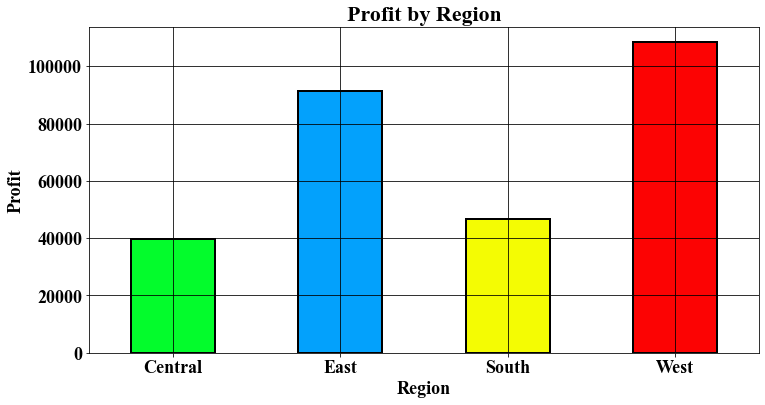

In [6]:
df.groupby("Region")["Profit"].sum().plot(kind='bar', color = ["#03fc2c", "#03a1fc","#f4fc03", "#fc0303"],  edgecolor = "#000000",figsize = (12,6), linewidth = 2)

plt.ylabel('Profit', fontsize=18,fontname="Times New Roman",fontweight="bold")
plt.xlabel("Region", fontsize=18,fontname="Times New Roman",fontweight="bold")
plt.xticks(rotation = 0, fontsize=18,fontname="Times New Roman",fontweight="bold")
plt.yticks(rotation = 0, fontsize=18,fontname="Times New Roman",fontweight="bold")
plt.title('Profit by Region', fontsize=22,fontname="Times New Roman",fontweight="bold")
plt.grid(color = "k")
plt.show()

- The **Green** color shows the **Central Region** and it has a profit of **39706 usd** 
- The **Blue** color shows the **East Region** and it has a profit of around **91522 usd** 
- The **Yellow** color shows the **South Region** and it has a profit of around **46749 usd** 
- The **Red** color shows the **West Region** and it has a profit of around **108418 usd** 

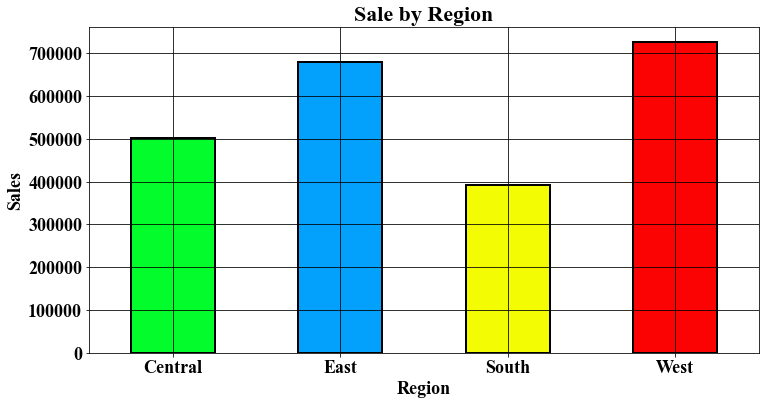

In [7]:
df.groupby("Region")["Sales"].sum().plot(kind='bar', color = ["#03fc2c", "#03a1fc","#f4fc03", "#fc0303"],  edgecolor = "#000000",figsize = (12,6), linewidth = 2)

plt.ylabel('Sales', fontsize=18,fontname="Times New Roman",fontweight="bold")
plt.xlabel("Region", fontsize=18,fontname="Times New Roman",fontweight="bold")
plt.xticks(rotation = 0, fontsize=18,fontname="Times New Roman",fontweight="bold")
plt.yticks(rotation = 0, fontsize=18,fontname="Times New Roman",fontweight="bold")
plt.title('Sale by Region', fontsize=22,fontname="Times New Roman",fontweight="bold")
plt.grid(color = "k")
plt.show()

- The **Green** color shows the **Central Region** and it has a Sale of **501239 usd** 
- The **Blue** color shows the **East Region** and it has a Sale of around **678781 usd** 
- The **Yellow** color shows the **South Region** and it has a Sale of around **391721 usd** 
- The **Red** color shows the **West Region** and it has a Sale of around **725457 usd**

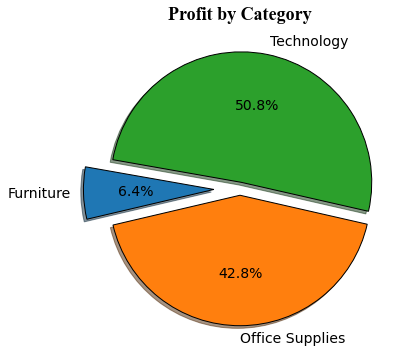

In [8]:
values =  list(df.groupby("Category")["Profit"].sum())
mylabels = ["Furniture", "Office Supplies", "Technology"]
plt.figure(figsize=(6,6))
plt.pie(values, labels = mylabels, autopct= "%1.1f%%", explode=[0.2, 0.05, 0.05],wedgeprops={"edgecolor" : "k"},shadow= True, textprops={"size":14 }, startangle = 170)
plt.title('Profit by Category', fontsize=18,fontname="Times New Roman",fontweight="bold")
plt.show()

- The profit by Technology is 50.8% , Office Supplies profit is 42.8% and Furniture is 6.4% of the Total Market.

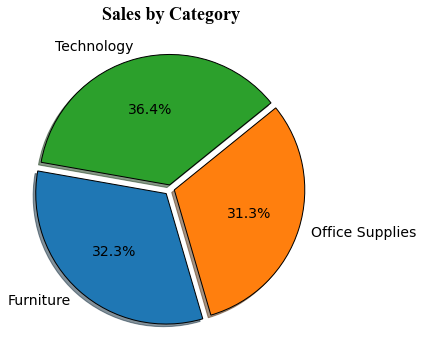

In [9]:
values =  list(df.groupby("Category")["Sales"].sum())
mylabels = ["Furniture", "Office Supplies", "Technology"]
plt.figure(figsize=(6,6))
plt.pie(values, labels = mylabels, autopct= "%1.1f%%", explode=[0.05, 0.03, 0.03],wedgeprops={"edgecolor" : "k"},shadow= True, textprops={"size":14 }, startangle = 170)
plt.title('Sales by Category', fontsize=18,fontname="Times New Roman",fontweight="bold")
plt.show()

- The Sale by Technology is 36.4% , Office Supplies profit is 31.3% and Furniture is 32.3 % of the Total Market.

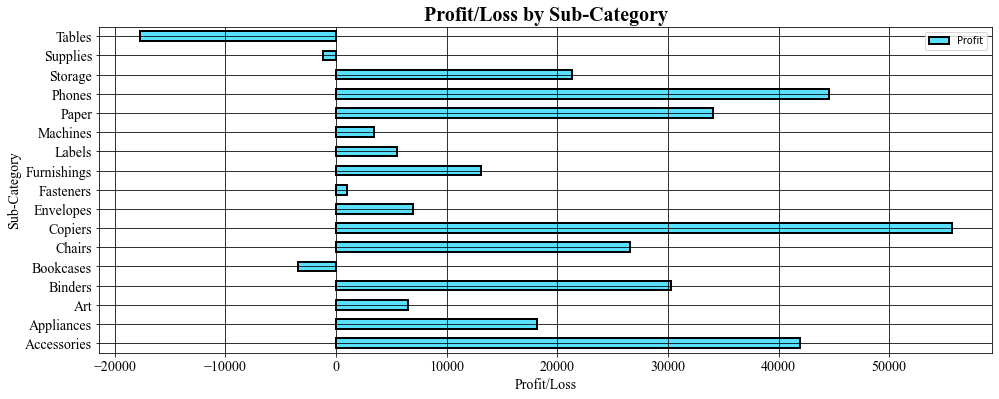

In [10]:
df.groupby("Sub-Category")[["Profit"]].sum().plot(kind='barh', color = ["#59e0ff"],  edgecolor = "#000000",figsize = (16,6), linewidth = 2)

plt.ylabel('Sub-Category', fontsize=14,fontname="Times New Roman")
plt.xlabel("Profit/Loss", fontsize=14,fontname="Times New Roman", rotation = 0)
plt.xticks(rotation = 0, fontsize=14,fontname="Times New Roman")
plt.yticks(rotation = 0, fontsize=14,fontname="Times New Roman")
plt.title('Profit/Loss by Sub-Category', fontsize=20,fontname="Times New Roman",fontweight="bold")
plt.grid(color = "k")
plt.show()

From the above graph we can see the profit and loss that a product have. So, by seeing the graph we can observe that the tables , supplies and bookcases are being in loss while phones , copiers and accessories are having the highest number of profits.

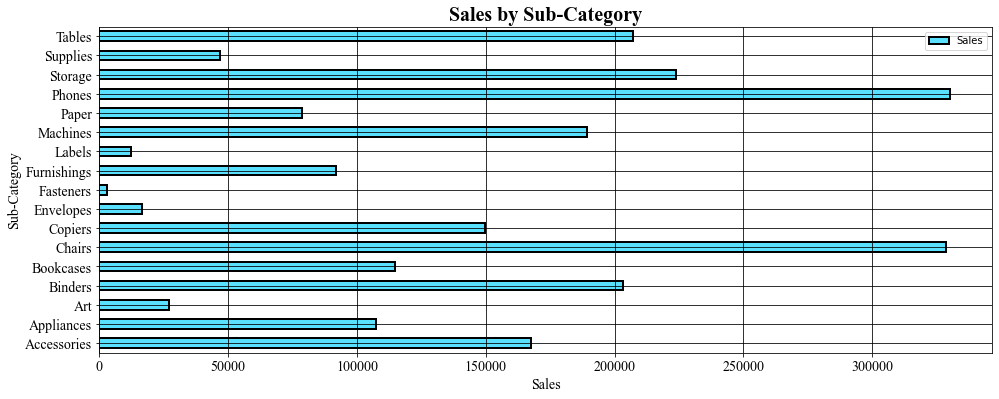

In [11]:
df.groupby("Sub-Category")[["Sales"]].sum().plot(kind='barh', color = ["#59e0ff"],  edgecolor = "#000000",figsize = (16,6), linewidth = 2)

plt.ylabel('Sub-Category', fontsize=14,fontname="Times New Roman")
plt.xlabel("Sales", fontsize=14,fontname="Times New Roman", rotation = 0)
plt.xticks(rotation = 0, fontsize=14,fontname="Times New Roman")
plt.yticks(rotation = 0, fontsize=14,fontname="Times New Roman")
plt.title('Sales by Sub-Category', fontsize=20,fontname="Times New Roman",fontweight="bold")
plt.grid(color = "k")
plt.show()

From the above graph we can that the phones ,chairs, storage, tables and binders are having the highest number of sales but we have also seen from the previous graph that tables are in loss.

In [12]:
df["Order Date Day"] = df["Order Date"].dt.day_name()

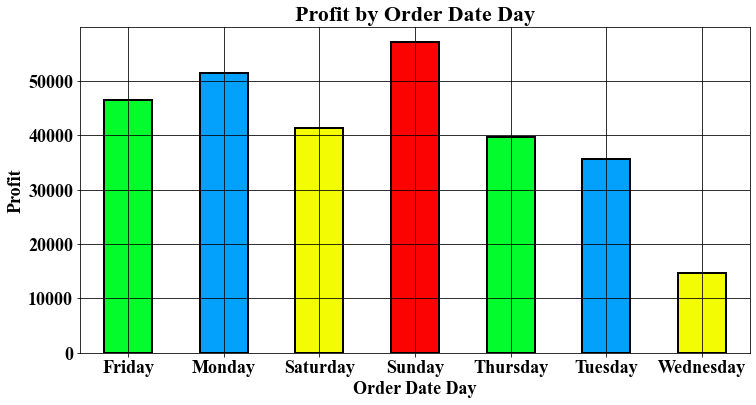

In [13]:
df.groupby("Order Date Day")["Profit"].sum().plot(kind='bar', color = ["#03fc2c", "#03a1fc","#f4fc03", "#fc0303"],  edgecolor = "#000000",figsize = (12,6), linewidth = 2)

plt.ylabel('Profit', fontsize=18,fontname="Times New Roman",fontweight="bold")
plt.xlabel("Order Date Day", fontsize=18,fontname="Times New Roman",fontweight="bold")
plt.xticks(rotation = 0, fontsize=18,fontname="Times New Roman",fontweight="bold")
plt.yticks(rotation = 0, fontsize=18,fontname="Times New Roman",fontweight="bold")
plt.title('Profit by Order Date Day', fontsize=22,fontname="Times New Roman",fontweight="bold")
plt.grid(color = "k")
plt.show()

From the above graph we can see that which day is perfect for sales.So, by observing the graph we can see that sunday and Monday is the day which is having the highest number of sales and wednesday is the day having the least number of sales.

## <left><center><font  color="purple">DATA PREPARATION</font><center>

In [14]:
def Region(x):
    if x == "West":
        return 0
    elif x == "East":
        return 1
    elif x == "Central":
        return 2
    else :
        return 3
    

# Apply to DataFrame
df['Region'] = df['Region'].apply(Region)
df.head(2)

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Order Date Day
Row ID,,,,,,,,,,,,,,,,,,,,,
1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,3,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136,Tuesday
2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,3,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820,Tuesday


In [15]:
def ShipMode(x):
    if x == "Standard Class":
        return 0
    elif x == "Second Class":
        return 1
    elif x == "First Class":
        return 2
    else :
        return 3
    

# Apply to DataFrame
df['Ship Mode'] = df['Ship Mode'].apply(ShipMode)
df.head(2)

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Order Date Day
Row ID,,,,,,,,,,,,,,,,,,,,,
1,CA-2016-152156,2016-11-08,2016-11-11,1,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,3,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136,Tuesday
2,CA-2016-152156,2016-11-08,2016-11-11,1,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,3,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820,Tuesday


In [16]:
def Segment(x):
    if x == "Consumer":
        return 0
    elif x == "Corporate":
        return 1
    else :
        return 3
    

# Apply to DataFrame
df['Segment'] = df['Segment'].apply(Segment)
df.head(2)

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Order Date Day
Row ID,,,,,,,,,,,,,,,,,,,,,
1,CA-2016-152156,2016-11-08,2016-11-11,1,CG-12520,Claire Gute,0,United States,Henderson,Kentucky,42420,3,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136,Tuesday
2,CA-2016-152156,2016-11-08,2016-11-11,1,CG-12520,Claire Gute,0,United States,Henderson,Kentucky,42420,3,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820,Tuesday


In [17]:
def Category(x):
    if x == "Office Supplies":
        return 0
    elif x == "Furniture":
        return 1
    else :
        return 3
    

# Apply to DataFrame
df['Category'] = df['Category'].apply(Category)
df.head(2)

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Order Date Day
Row ID,,,,,,,,,,,,,,,,,,,,,
1,CA-2016-152156,2016-11-08,2016-11-11,1,CG-12520,Claire Gute,0,United States,Henderson,Kentucky,42420,3,FUR-BO-10001798,1,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136,Tuesday
2,CA-2016-152156,2016-11-08,2016-11-11,1,CG-12520,Claire Gute,0,United States,Henderson,Kentucky,42420,3,FUR-CH-10000454,1,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820,Tuesday


In [18]:
def Sub_Category(x):
    if x == "Binders":
        return 0
    elif x == "Paper":
        return 1
    elif x == "Furnishings":
        return 
    elif x == "Phones":
        return 2
    elif x == "Storage":
        return 3
    elif x == "Art":
        return 4
    elif x == "Accessories":
        return 5
    elif x == "Chairs":
        return 6
    elif x == "Appliances":
        return 7
    elif x == "Labels":
        return 8
    elif x == "Tables":
        return 9
    elif x == "Envelopes":
        return 10
    elif x == "Bookcases":
        return 11
    elif x == "Fasteners":
        return 12
    elif x == "Supplies":
        return 13
    elif x == "Machines":
        return 14
    else :
        return 15
    

# Apply to DataFrame
df['Sub-Category'] = df['Sub-Category'].apply(Sub_Category)
df.head(2)

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Order Date Day
Row ID,,,,,,,,,,,,,,,,,,,,,
1,CA-2016-152156,2016-11-08,2016-11-11,1,CG-12520,Claire Gute,0,United States,Henderson,Kentucky,42420,3,FUR-BO-10001798,1,11.0,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136,Tuesday
2,CA-2016-152156,2016-11-08,2016-11-11,1,CG-12520,Claire Gute,0,United States,Henderson,Kentucky,42420,3,FUR-CH-10000454,1,6.0,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820,Tuesday


In [19]:
def Order_Date_Day(x):
    if x == "Saturday":
        return 0
    elif x == "Sunday":
        return 1
    elif x == "Monday":
        return 2
    elif x == "Tuesday":
        return 3
    elif x == "Wednesday":
        return 4
    elif x == "Thursay":
        return 5
    else :
        return 6
    

# Apply to DataFrame
df['Order Date Day'] = df['Order Date Day'].apply(Order_Date_Day)
df.head(2)

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Order Date Day
Row ID,,,,,,,,,,,,,,,,,,,,,
1,CA-2016-152156,2016-11-08,2016-11-11,1,CG-12520,Claire Gute,0,United States,Henderson,Kentucky,42420,3,FUR-BO-10001798,1,11.0,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136,3
2,CA-2016-152156,2016-11-08,2016-11-11,1,CG-12520,Claire Gute,0,United States,Henderson,Kentucky,42420,3,FUR-CH-10000454,1,6.0,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820,3


In [21]:
# import the label encoder 
le = LabelEncoder()

# apply the label encoder
df['City'] = le.fit_transform(df['City'])
df['State'] = le.fit_transform(df['State'])
df['Product ID'] = le.fit_transform(df['Product ID'])
df['Product Name'] = le.fit_transform(df['Product Name'])
df['Customer ID'] = le.fit_transform(df['Customer ID'])
df['Customer Name'] = le.fit_transform(df['Customer Name'])

In [20]:
# drop the country column because we have only US in country column
df.drop(columns = "Country", inplace = True)

In [22]:
# check the top 2 rows of the dataset
df.head(2)

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Order Date Day
Row ID,,,,,,,,,,,,,,,,,,,,
1,CA-2016-152156,2016-11-08,2016-11-11,1,143,166,0,194,15,42420,3,12,1,11.0,386,261.96,2,0.0,41.9136,3
2,CA-2016-152156,2016-11-08,2016-11-11,1,143,166,0,194,15,42420,3,55,1,6.0,839,731.94,3,0.0,219.5820,3


**Correlation matrix**

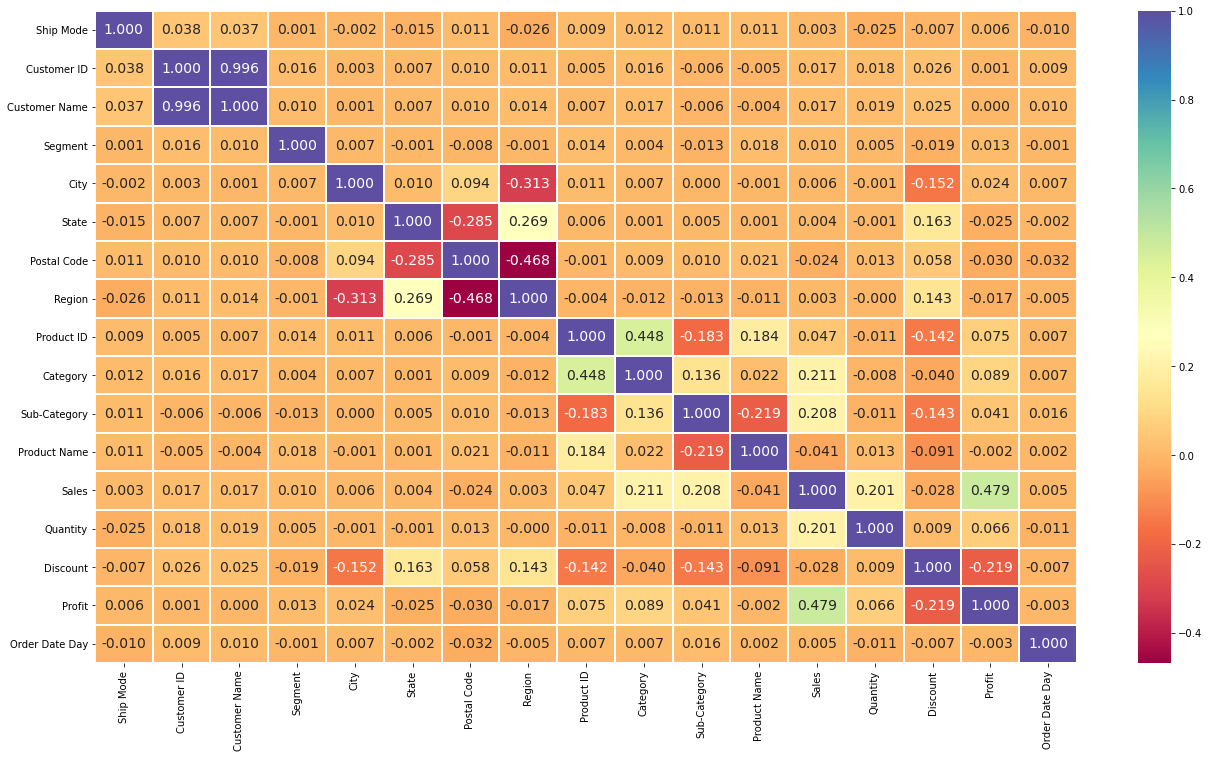

In [23]:
# Heatmap of the Correlation Matrix
plt.figure(figsize=(22, 12))
sns.heatmap(df.corr(),xticklabels=df.corr().columns.values,yticklabels=df.corr().columns.values,
            annot=True,linewidths = 1, fmt = ".3f", annot_kws= {"size": 14}, cmap = "Spectral");

- From the above correlation we can say that our target variable(Profit) is High correlation with sales so our feature is  only sales

In [24]:
df.head(2)

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Order Date Day
Row ID,,,,,,,,,,,,,,,,,,,,
1,CA-2016-152156,2016-11-08,2016-11-11,1,143,166,0,194,15,42420,3,12,1,11.0,386,261.96,2,0.0,41.9136,3
2,CA-2016-152156,2016-11-08,2016-11-11,1,143,166,0,194,15,42420,3,55,1,6.0,839,731.94,3,0.0,219.5820,3


## <left><center><font color="purple">MACHINE LEARNING</font><center>

**Separeate the variables into feature matrix (X) and target variable (y).**

In [25]:
y = df[["Profit"]].values
X = df[["Sales"]].values

**Splitting the data for Training and Testing (Test size=20%)**

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [27]:
#checking of size (rows) of the data
print(f"There are {df.shape[0]} rows in the dataset")
#checking of size (rows) of the data
print(f"There are {X_train.shape[0]} rows in train data which is {round(X_train.shape[0]/df.shape[0]*100, 0)} ")
#checking of size (rows) of the data
print(f"There are {X_test.shape[0]} rows in test data which is {round(X_test.shape[0]/df.shape[0]*100, 0)} ")

There are 9994 rows in the dataset
There are 7995 rows in train data which is 80.0 
There are 1999 rows in test data which is 20.0 


**Decision Tree Regressor**

In [28]:
dt = DecisionTreeRegressor(random_state = 42)
dt.fit(X_train, y_train)
dt = dt.fit(X_train, y_train)

# check accuracy
accuracy_dt = (dt.score(X_test, y_test)*100)
# print accurcay
print(f"The test score from Decision Tree Regressor  model is {accuracy_dt}\n")

The test score from Decision Tree Regressor  model is 33.00950256912206



**Random Forest Regressor**

In [29]:
rfr = RandomForestRegressor(random_state = 42)
rfr.fit(X_train, y_train)

# check accuracy
accuracy_rfr = (rfr.score(X_test, y_test)*100)
# print accurcay
print(f"The test score from Random Forest Regressor model is {accuracy_rfr}\n")

The test score from Random Forest Regressor model is 39.02959085677627



**XG BOOST REGRESSOR**

In [30]:
xgb = XGBRegressor(random_state = 42)
xgb.fit(X_train, y_train)

# check accuracy
accuracy_xgb = (xgb.score(X_test, y_test)*100)
# print accurcay
print(f"The test score from XG BOOST REGRESSOR model is {accuracy_xgb}\n")

The test score from XG BOOST REGRESSOR model is 42.50370446767532



**Accuracy of all Model**

In [31]:
models = pd.DataFrame({
    'Model': ['Random Forest Regressor', 'XG Boost Regressor', 'Decision Tree Regressor'],
    'Accuracy': [accuracy_rfr, accuracy_xgb , accuracy_dt],
})
models

,Model,Accuracy
0,Random Forest Regressor,39.029591
1,XG Boost Regressor,42.503704
2,Decision Tree Regressor,33.009503


**Conclusion**

As you can see above we use  'Random Forest Regressor', 'XG Boost Regressor' and  'Decision Tree Regressor' and their respective acuracy are 39.02%, 42.5% and  33.00% so we will use 'Random Forest Regressor' and  'XG Boost Regressor' for hyper parameter tuning with cross validation for our analysis. 

# Hyper Parameter Tunning with Cross Validtion

**Random Forest Regressor**

In [32]:
# import random forest regressor  and store in RFR
RFR = RandomForestRegressor(random_state = 42)

# define the parameters 
param_grid = {'n_estimators': [20,25,30]}

# for the model and apply grid search cv to find the best model and cross validation = 3
grid_search_RFR = GridSearchCV(estimator = RFR, param_grid = param_grid,cv= 3 ,n_jobs = -1)

# fit the model
grid_search_RFR.fit(X_train,y_train)


# find the best parameter 
print("Best params:\n{}\n".format(grid_search_RFR.best_params_))

# Accuracy at best parameter
print("Accuracy after tunning: {:.2f}".format(grid_search_RFR.score(X_test, y_test)*100))

Best params:
{'n_estimators': 30}

Accuracy after tunning: 39.33


**XG BOOST REGRESSOR**

In [33]:
# import xgb regressor  and store in XGB
XGB = XGBRegressor()

# define the parameters 
param_grid = {'n_estimators': [2,5,10,15,20,25]}

# for the model and apply grid search cv to find the best model and cross validation = 3
grid_search_XGB = GridSearchCV(estimator = XGB, param_grid = param_grid,cv= 3 ,n_jobs = -1)

# fit the model
grid_search_XGB.fit(X_train,y_train)

# find the best parameter 
print("Best params:\n{}\n".format(grid_search_XGB.best_params_))

# Accuracy at best parameter
print("Accuracy after tunning: {:.2f}".format(grid_search_XGB.score(X_test, y_test)*100))

Best params:
{'n_estimators': 5}

Accuracy after tunning: 43.53


**CONCLUSION**

       As you can see we use the Random Forest Regressor by cross validation = 3 and use one parameters for tuning,
        
                         {'n_estimators': [20,25,30]}
                         
                         
       when we evaluate the model the best cross validation score is  with the best parameter, n_extimator = 30, 
       we achieve higher accuracy then from simple  Random Forest Regressor.
      
      Similarly, 
      
      when  we use the XG Boost  Regressor by cross validation = 3 and use one parameters for tuning,
        
                         {'n_estimators': [2,5,10,15,20,25]} 
                         
                         
       when we evaluate the model the best cross validation score is  with the best parameter, n_extimator = 5, 
       we achieve higher accuracy then from simple  XG Boost Regressor.
       
       
       By Comparing both Random Forest and XG Boost From Hyper Parameter Tunning with corss validtion we can aboserve 
       XG Boost is performing good so we can make prediction by tuned XG Boost model to predict the price of US store

## <center><font color="green">Predictions</font><center>

In [34]:
input_test= np.array([[3000]])
profit = grid_search_XGB.predict(input_test)
dash = '-' * 120

print(dash)
print(f"\t\t\t\t\tThe Predicted Profit is {round(profit[0],0)} USD")
print(dash)

------------------------------------------------------------------------------------------------------------------------
					The Predicted Profit is 533.0 USD
------------------------------------------------------------------------------------------------------------------------
